<a href="https://colab.research.google.com/github/Kamilmerito/Projets-ML/blob/main/PROJET_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**partie 1**

**Analyse d'une campagne marketing avec pandas**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#impôrtation des données
marketing_df=pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [47]:
print(marketing_df.info())
print('\n')
marketing_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None




,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [48]:
col=list(marketing_df.columns)


In [49]:
for col in marketing_df.select_dtypes('object'):
  print(f'{col:-<10}{marketing_df[col].unique()}')

user_id---['a100000029' 'a100000030' 'a100000031' ... 'a100007292' 'a100007293'
 'a100007294']
date_served['1/1/18' '1/2/18' '1/3/18' '1/4/18' '1/5/18' '1/6/18' '1/7/18' '1/8/18'
 '1/9/18' '1/10/18' '1/11/18' '1/12/18' '1/13/18' '1/14/18' '1/15/18'
 '1/16/18' '1/17/18' '1/18/18' '1/19/18' '1/20/18' '1/21/18' '1/22/18'
 '1/23/18' '1/24/18' '1/25/18' '1/26/18' '1/27/18' '1/28/18' '1/29/18'
 '1/30/18' '1/31/18' nan]
marketing_channel['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]
variant---['personalization' 'control']
converted-[True False nan]
language_displayed['English' 'German' 'Arabic' 'Spanish']
language_preferred['English' 'German' 'Arabic' 'Spanish']
age_group-['0-18 years' '19-24 years' '24-30 years' '30-36 years' '36-45 years'
 '45-55 years' '55+ years']
date_subscribed['1/1/18' '1/2/18' '1/3/18' '1/4/18' '1/5/18' '1/6/18' '1/7/18' '1/8/18'
 '1/9/18' '1/10/18' '1/11/18' '1/12/18' '1/13/18' '1/14/18' '1/15/18'
 '1/16/18' '1/17/18' '1/18/18' '1/19/18' '1/20/18' '1/21/18' 

Les variables **date_serverd,date_subscribed et date_canceled** sont des dates  et ne sont pas au bon format. Nous mettrons ces variables au format 'Datetime'.

# statistique

In [50]:
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


En utilisant les données, répondons aux questions très importantes pour l'entreprise

**CANAUX MARKETING UTLISES PAR L'ENTREPRISE**

In [51]:
marketing_df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [52]:
#Pour avoir plutôt la proportion
marketing_df['marketing_channel'].value_counts(normalize=True)

House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: marketing_channel, dtype: float64

L'Entreprise utilise majoritairement( un peu plus de  47%) les annonces auto-promotionnelles.

Text(0.5, 1.0, 'canaux marketing')

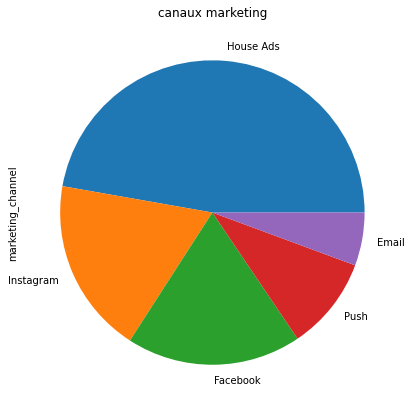

In [53]:
#canaux marketing
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')
plt.title('canaux marketing')

**VARABLES DE DATES AU FORMAT DATETIME**

In [54]:
#Changement dutype de certaines colonnes 
col_date=['date_served', 'date_subscribed', 'date_canceled']

In [55]:
for col in col_date:
  marketing_df[col]=pd.to_datetime(marketing_df[col])

In [56]:
#Vérification
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

*Les variables dates sont maintenant au bon format.*

In [57]:
#quel nombre d'utilisateurs retenus par la campagne de marketing?
#nombre d'utilisateur retenus:
marketing_df['is_retained'].sum()

1279

1279 utilsateurs sont retenus par la campagne de marketing . Soit 69% des utilisateurs

In [58]:
marketing_df['is_retained'].value_counts(normalize=True)

True     0.689116
False    0.310884
Name: is_retained, dtype: float64

**Création des nouvelles colonnes**

Lors d'une analyse de données, on peut être amené à créer de nouvelles variables à partir de celles existantes. Nous allons créer une nouvelle variable par encodage des modalités de la variable **subscribing_channel**